In [1]:
!pip install -U diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 35.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.32.2
    Uninstalling diffusers-0.32.2:
      Successfully uninstalled diffusers-0.32.2


Model page: https://huggingface.co/dataautogpt3/ProteusV0.3

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/dataautogpt3/ProteusV0.3)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [4]:
import torch
from diffusers import (
    StableDiffusionXLPipeline, 
    KDPM2AncestralDiscreteScheduler,
    AutoencoderKL
)

# Load VAE component
vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix", 
    torch_dtype=torch.float16
)

# Configure the pipeline
pipe = StableDiffusionXLPipeline.from_pretrained(
    "dataautogpt3/ProteusV0.3", 
    vae=vae,
    torch_dtype=torch.float16
)
pipe.scheduler = KDPM2AncestralDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.to('cuda')

# Define prompts and generate image
prompt = "a CEO in the office"
negative_prompt = "nsfw, bad quality, bad anatomy, worst quality, low quality, low resolutions, extra fingers, blur, blurry, ugly, wrongs proportions, watermark, image artifacts, lowres, ugly, jpeg artifacts, deformed, noisy image"

image = pipe(
    prompt, 
    negative_prompt=negative_prompt, 
    width=1024,
    height=1024,
    guidance_scale=7,
    num_inference_steps=20
).images[0]


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--dataautogpt3--ProteusV0.3/snapshots/915e423763ae349867d2f5b74a0ee750535e3fd2/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--dataautogpt3--ProteusV0.3/snapshots/915e423763ae349867d2f5b74a0ee750535e3fd2/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/20 [00:00<?, ?it/s]

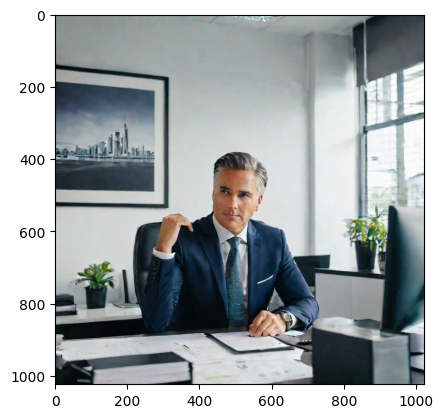

In [5]:
import matplotlib.pyplot as plt

plt.imshow(image)